# Part II - Ford Go Bike : Data Presentation
## by Kelvin Okumu

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

* Loading the dataset

In [3]:
bikes = pd.read_csv("fordgobike_tripdata.csv")
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


* duration_sec - duration in seconds
* start_time - when the bike was taken out
* end_time - when the bike was returned
* start_station_id - uniques identification number for the station
* start_station_name - station name
* start_station_latitude
* start_station_longitude
* end_station_id - uniques identification number for the station
* end_station_name - station name
* end_station_latitude
* end_station_longitude
* bike_id - unique identification for each bike
* user_type - User type - Either Customer or Subscriber
* member_birth_year - When the member was born
* member_gender - Gender of the member
* bike_share_for_all_trip - Whether the bike was shared or not

In [4]:
bikes.shape

(183412, 16)

In [5]:
# checking for missing values
bikes.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
#Removing missing values.
bikes = bikes.dropna()

In [7]:
#removing columns that wont be used in the analysis
bikes.drop(['end_station_latitude','end_station_longitude','start_station_latitude','start_station_longitude'], axis = 1, inplace = True)

In [8]:
# change the data types of the three columns to int
bikes.start_station_id = bikes.start_station_id.astype(int)
bikes.end_station_id = bikes.end_station_id.astype(int)
bikes.member_birth_year = bikes.member_birth_year.astype(int)

In [9]:
# change the data types of the two columns to datetime
bikes.start_time = pd.to_datetime(bikes.start_time)
bikes.end_time = pd.to_datetime(bikes.end_time)

In [10]:
# change the data type to Category for Gender and User_Type
bikes.member_gender = bikes.member_gender.astype('category')
bikes.user_type = bikes.user_type.astype('category')

In [11]:
# adding two columns for duration in minutes and hours
bikes["duration_minutes"] = bikes.duration_sec.div(60).round(2)

In [12]:
bikes["duration_hours"] = bikes.duration_minutes.div(60).round(2)

In [13]:
# Add age column with the year as 2019
bikes["age"] = 2019 - bikes.member_birth_year

In [14]:
# Add a new column for the day of the week.
bikes["start_day"] = bikes["start_time"].dt.day_name()

In [15]:
#Add new columns getting the starting and ending times in hours
bikes["start_hour"] = bikes["start_time"].dt.hour
bikes["end_hour"] = bikes["end_time"].dt.hour

In [16]:
column_names = ["start_day","start_time","end_time","start_hour","end_hour","duration_sec","duration_minutes","duration_hours","start_station_id","start_station_name","end_station_id","end_station_name","bike_id","user_type","member_birth_year","age","member_gender","bike_share_for_all_trip"]
bikes = bikes.reindex(columns = column_names)

In [17]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_day                174952 non-null  object        
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_hour               174952 non-null  int64         
 4   end_hour                 174952 non-null  int64         
 5   duration_sec             174952 non-null  int64         
 6   duration_minutes         174952 non-null  float64       
 7   duration_hours           174952 non-null  float64       
 8   start_station_id         174952 non-null  int64         
 9   start_station_name       174952 non-null  object        
 10  end_station_id           174952 non-null  int64         
 11  end_station_name         174952 non-null  object        
 12  bike_id         

### What is the structure of your dataset?

* This dataset contains 174952 rows and 12 columns

### What is/are the main feature(s) of interest in your dataset?

* Gender - which gender does many cyclists belong to
* Age - which age does many cyclists belong to
* User_type - Between Subcribers and Customers which Category has avarged more ride time.
* Which Station had the most start and end trips

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* Gender 
* Age
* Duration
* User_Type
* Stations
* Start_time and End_time

In [18]:
# columns at the end of the wrangling stage
for col in bikes.columns:
    print(col)

start_day
start_time
end_time
start_hour
end_hour
duration_sec
duration_minutes
duration_hours
start_station_id
start_station_name
end_station_id
end_station_name
bike_id
user_type
member_birth_year
age
member_gender
bike_share_for_all_trip


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

##  1 Question

* Which gender uses the plartform more?

## Visualization

In [19]:
def PiePlots(xVar,mtitle):
    sorted_counts = xVar.value_counts();
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.2f%%');
    plt.title(mtitle, fontsize = 15);

## The Ratio of different Genders that use the plartform.

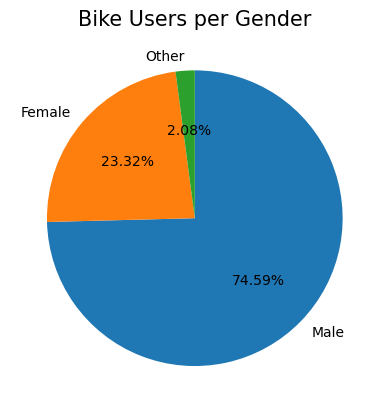

In [20]:
gender = bikes['member_gender']
PiePlots(gender,"Bike Users per Gender")

## Observations

Most of the riders were male at 74% of the total.

## 2 Question

* Which age group has more cyclists ?

## Visualization

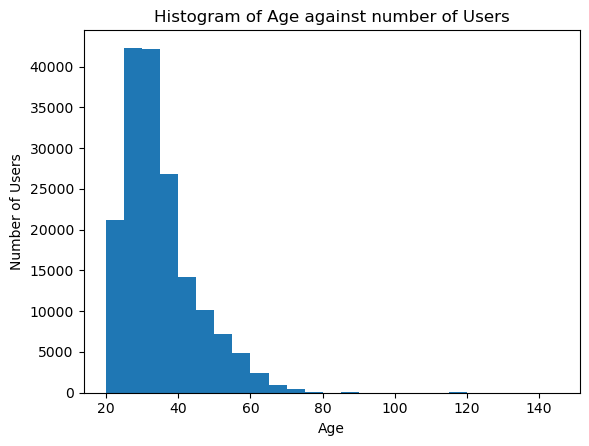

In [21]:
# Create a new figure
fig = plt.figure();

ax = fig.add_axes([.125, .125, .775, .755]);
bins = np.arange(20, bikes['age'].max()+5,5);
ax.hist(data = bikes, x = 'age', bins = bins);

ax.set_title("Histogram of Age against number of Users");
ax.set_xlabel('Age');
ax.set_ylabel('Number of Users');

## Observation

Most cyclists are aged between 30 - 35 and the number even lower at 55years and older.

## 3 Question
* Which user type has many cyclists

## Visualization

## Ratio of Users on the plartform.

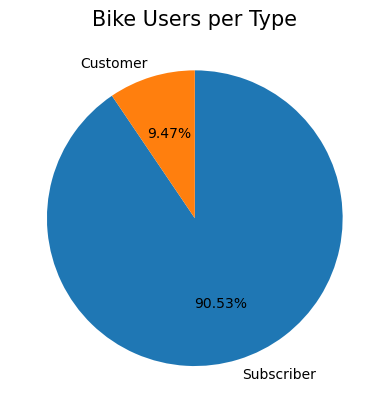

In [22]:
users = bikes['user_type']
PiePlots(users,'Bike Users per Type')

## Observation
There are more Subscribers than customers

## 4 Question
* What is the time distribution of the rides

## Visualization
In this plot I used log for better visualization.

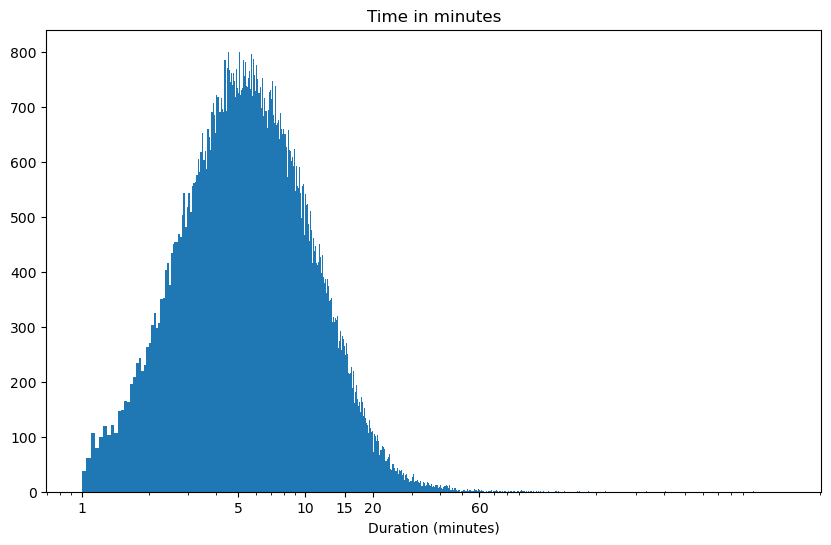

In [23]:
binsize = 0.05
bins = np.arange(1, (bikes['duration_minutes'].max())+binsize, binsize);
plt.figure(figsize = [10, 6]);
plt.hist(data = bikes , x = 'duration_minutes', bins = bins);
plt.xscale('log');
plt.xticks([1, 5 ,10, 15 ,20, 60],[1, 5 ,10, 15 ,20, 60]);
plt.xlabel('Duration (minutes)')
# plt.ylabel('Count')
plt.title('Time in minutes');

## Observation
From the observation, The Duration in minutes displays a normal figure which is not skeewed.

## 5 Question
* What are the popular starting hours of rides

## Visualization

In [24]:
def CountPlots(df, xVar):
    base_color = sb.color_palette()[0]
    plt.figure(figsize = [14,8])
    sb.countplot(data = df, x = xVar, edgecolor = 'black', color=base_color);
    plt.title(f'''Distribution of {xVar}'''.title(), fontsize = 14, weight = 'bold')
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    plt.ylabel('Frequency'.title(), fontsize = 10, weight = 'bold')

## Peak Starting Hours

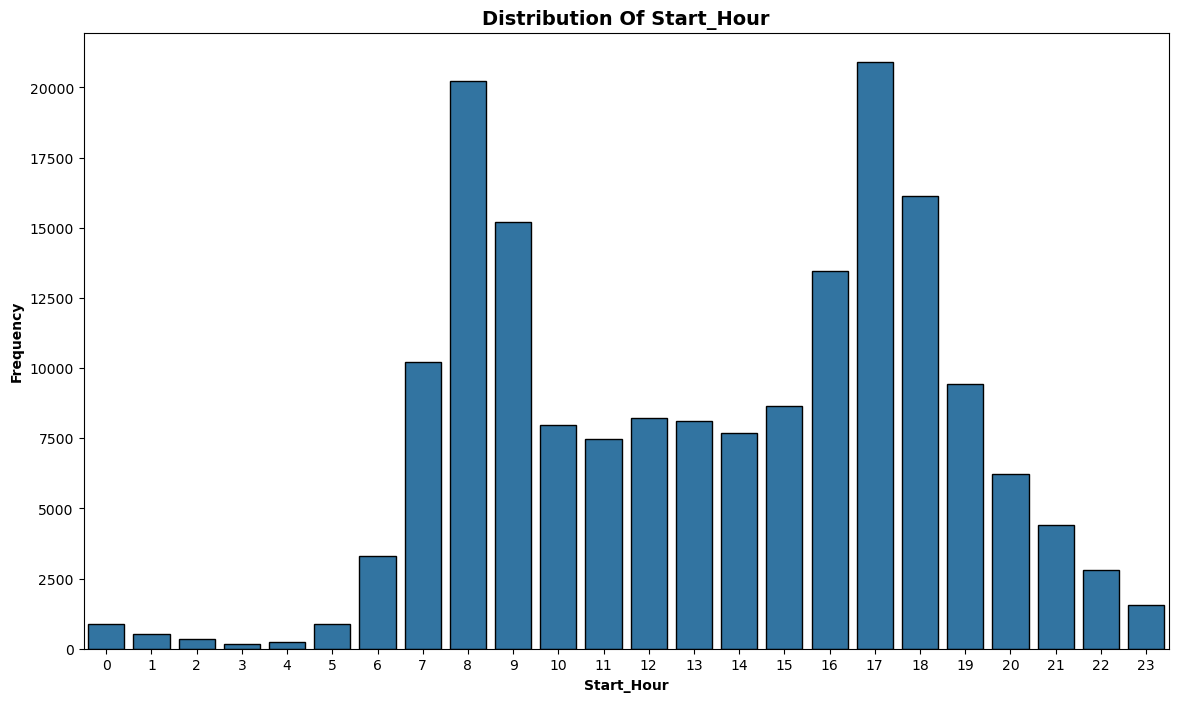

In [25]:
CountPlots(bikes, 'start_hour')

## Observation
Most rides start at 8AM and 6PM followed by 9AM and 7PM

## 6 Question
* What does most rides end

## Visualization

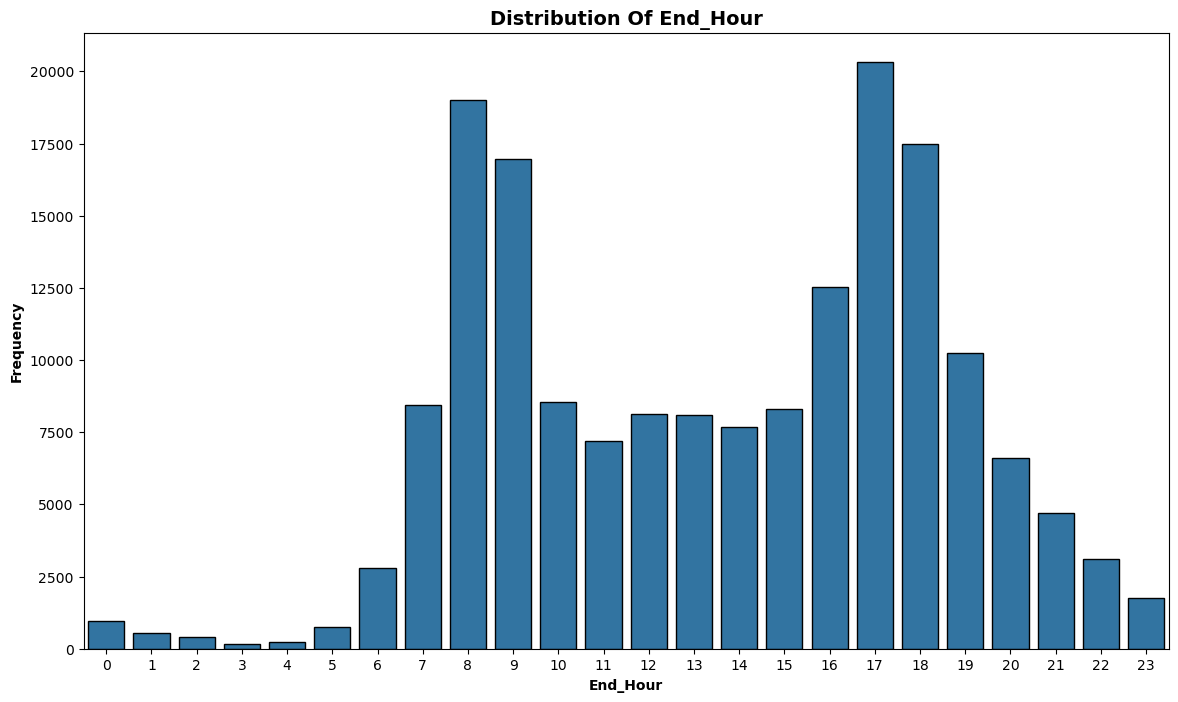

In [26]:
CountPlots(bikes, 'end_hour')

## Observation
Most rides end at 8AM, 9AM and 5PM, 6PM

## 7 Question
* How are rides through out the week?

## Visualization

## Distributions on different Days of the Week.

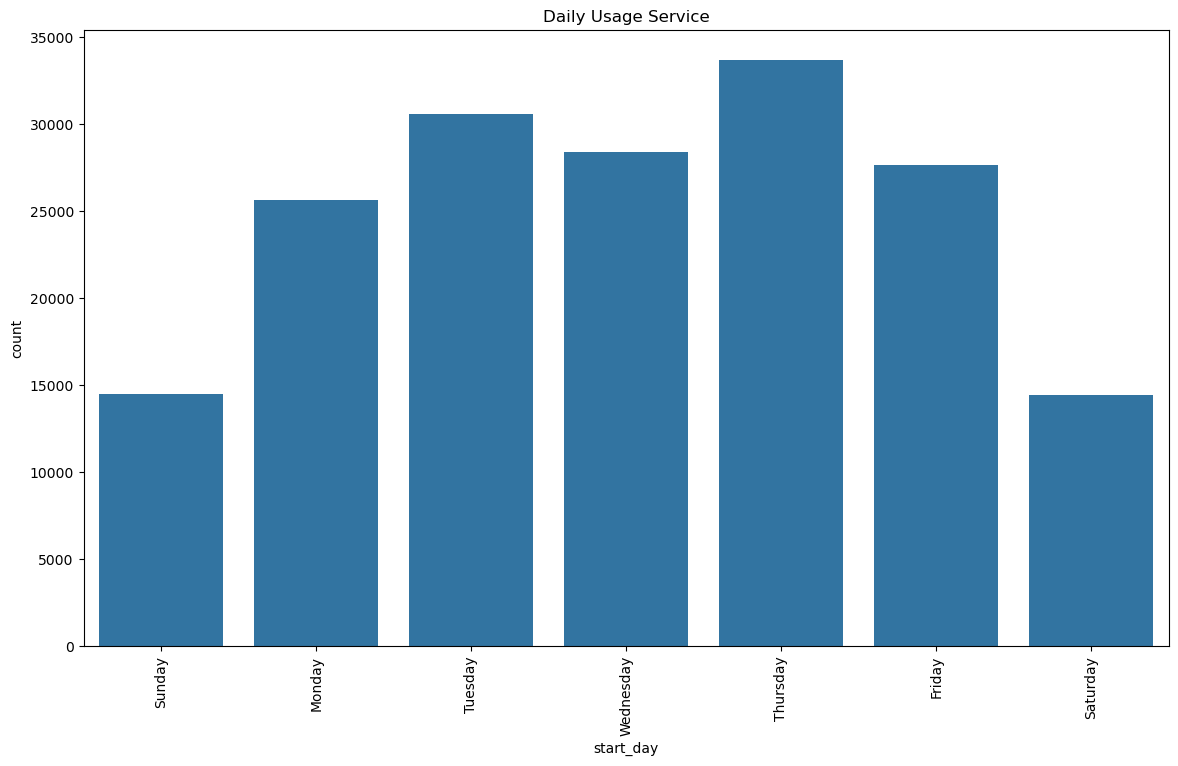

In [28]:

base_color = sb.color_palette()[0]
plt.figure(figsize=[14, 8]);
days_of_the_week = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
plt.xticks(rotation=90);
plt.title('Daily Usage Service');
sb.countplot(data = bikes, x = 'start_day', order = days_of_the_week, color = base_color);

## Observation
Weekends have relatively low numbers compared to weekdays

## In the next 2 plots I opted for horizontal bar because the names are long.

## 8 Question

* Which Station are most popular for starting rides

## Visualization

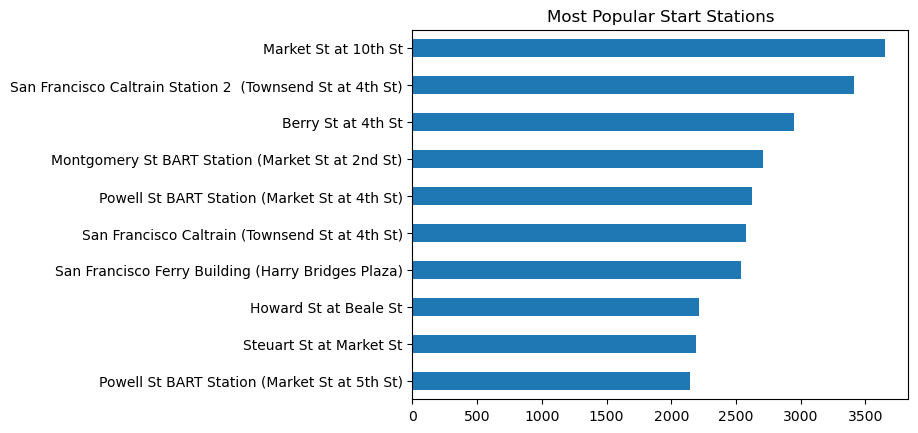

In [29]:
plt.title('Most Popular Start Stations')
bikes.start_station_name.value_counts(ascending=True).tail(10).plot.barh();

## Observation
From the plot above we are able to see top stations where most trips start.

## 9 Question

* Which Station are most popular for ending rides

## Visualization

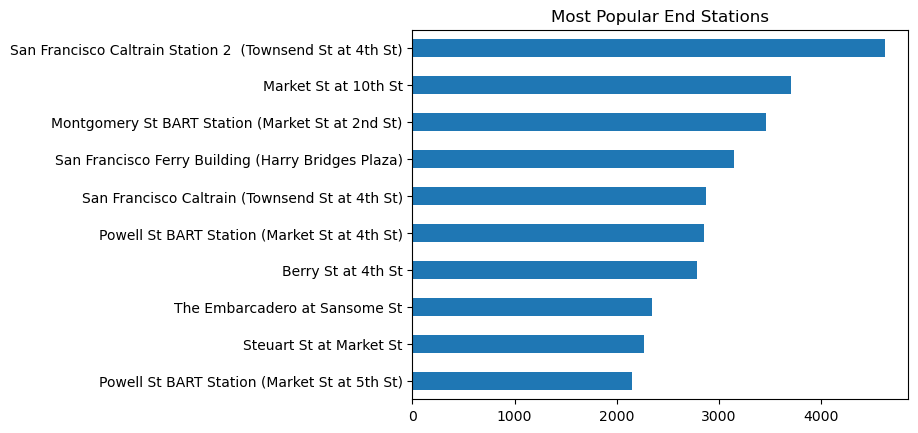

In [30]:
plt.title('Most Popular End Stations');
bikes.end_station_name.value_counts(ascending=True).tail(10).plot.barh();

## Observation
From the plot above we are able to see top stations where most trips end.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> >Some columns had be added while calculating the users age.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> While plotting time distribution i changed the time into seconds and then used log for proper plotting.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## 10 Question
* What is the relation between the 2 user_type groups and the duration covered

## Visualization

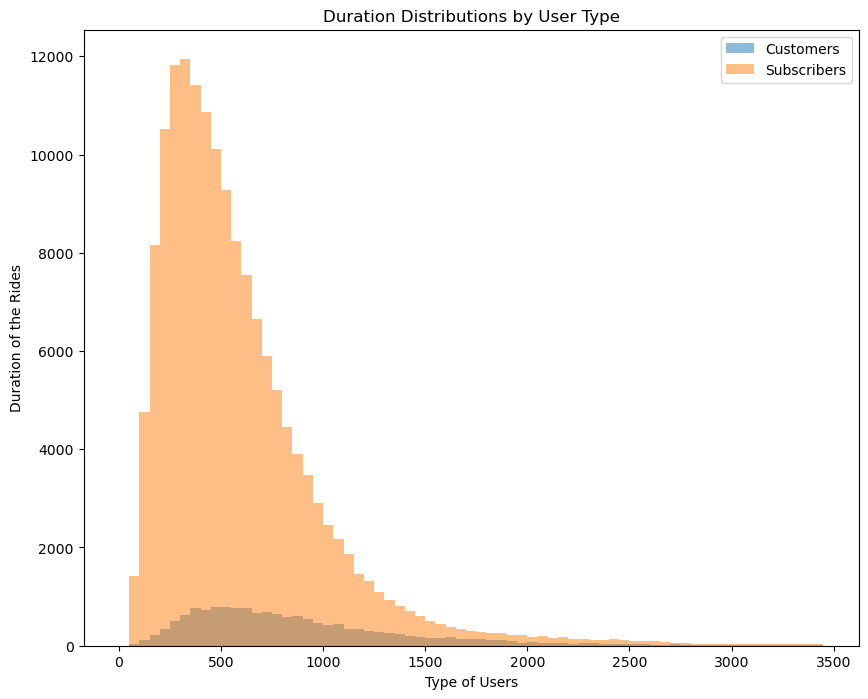

In [31]:
# get the Customers and Subscribers
customer = bikes['user_type']=='Customer'
subscriber = bikes['user_type']=='Subscriber'

plt.figure(figsize=(10,8));
bins = np.arange(0, 3500, 50);

plt.hist(bikes[customer].duration_sec, bins, alpha=0.5, label='Customers');
plt.hist(bikes[subscriber].duration_sec, bins, alpha=0.5, label='Subscribers');
plt.legend();

# adding labels
plt.ylabel("Duration of the Rides");
plt.xlabel("Type of Users");
plt.title('Duration Distributions by User Type');

## Observation
Subscribers had more duration compared to Customers.

## 11 Question
* What is the relation between the 3 genders provided and the duration covered

## Visualization

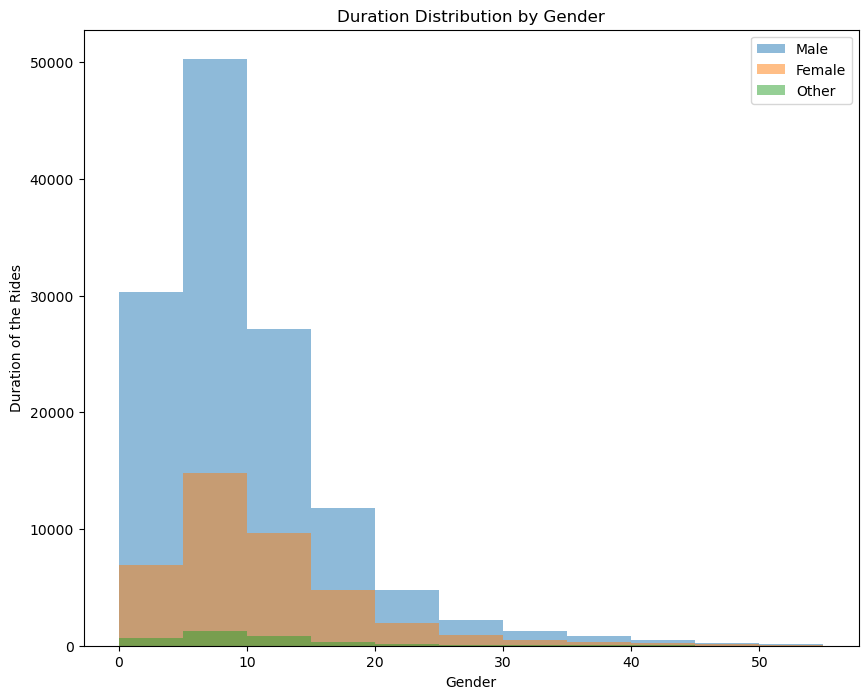

In [32]:
# get the Customers and Subscribers
male = bikes['member_gender']=='Male'
female = bikes['member_gender']=='Female'
other = bikes['member_gender']=='Other'

plt.figure(figsize=(10,8));
bins = np.arange(0, 60, 5);

plt.hist(bikes[male].duration_minutes, bins, alpha=0.5, label='Male');
plt.hist(bikes[female].duration_minutes, bins, alpha=0.5, label='Female');
plt.hist(bikes[other].duration_minutes, bins, alpha=0.5, label='Other');
plt.legend();

# adding labels
plt.ylabel("Duration of the Rides");
plt.xlabel("Gender");
plt.title('Duration Distribution by Gender');

## Observation
It is noted that male have more time duration compared to Female and Others

## 12 Question
* Bike usage per Day per User Type

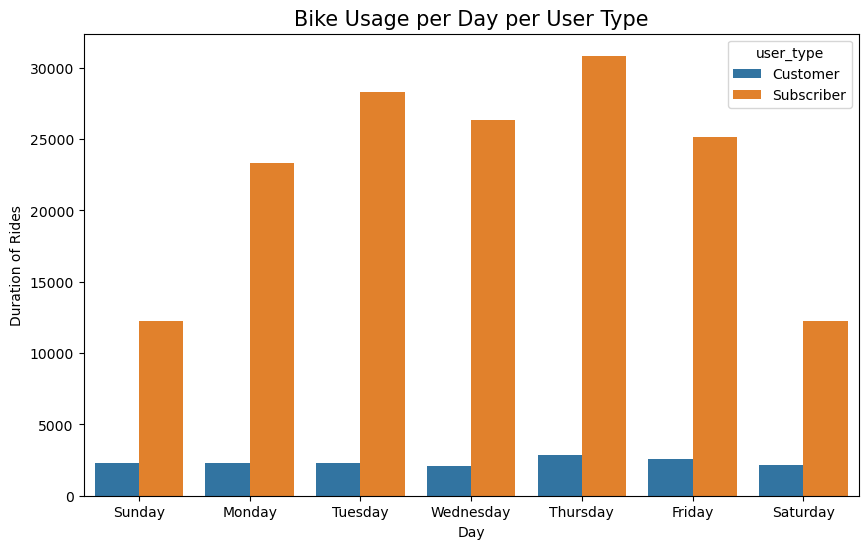

In [33]:
plt.figure(figsize=(10,6));
plt.title('Bike Usage per Day per User Type', fontsize=15);
chart = sb.countplot(data = bikes, x = 'start_day', order = days_of_the_week, hue='user_type');
chart.set(xlabel='Day', ylabel='Duration of Rides');

## Observation
>It is noted that during the weekends there is less usage as compared to weekdays for the Subscribers.

>Customers also seem to cover almost same distance through out the week.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I have noted that customers time duration doesn't change much when traced accross different days. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## 13 Question
* What is the relationship between the 2 bike share options and the duration?

## Visualization

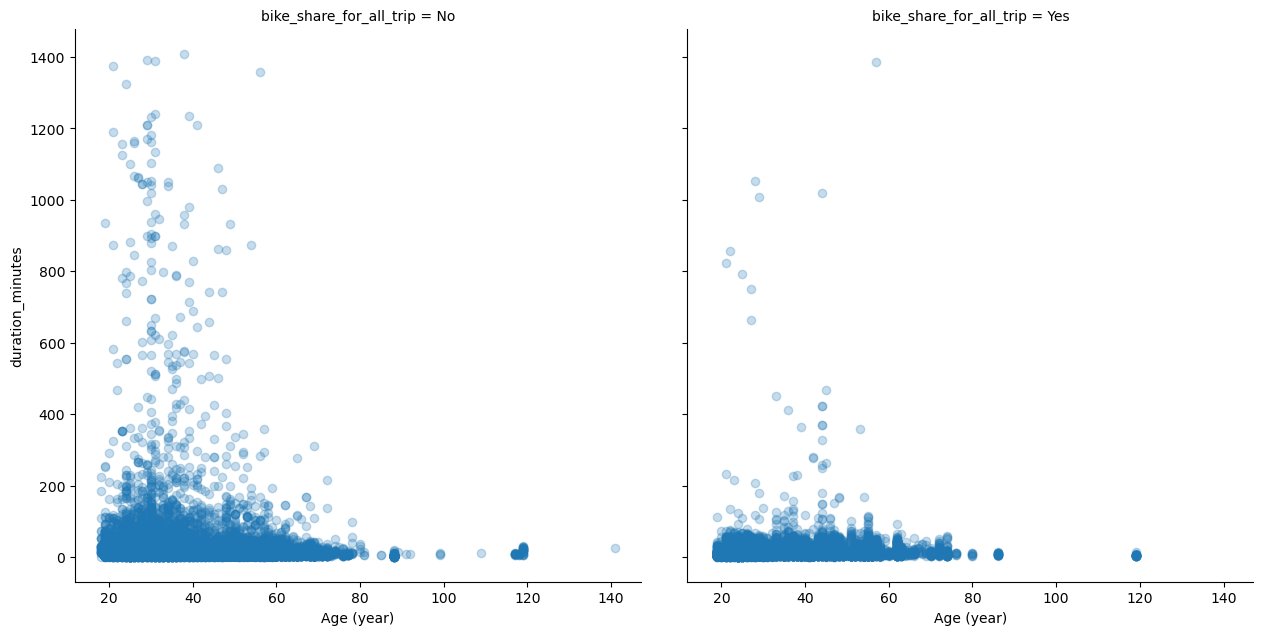

In [34]:
#Scatter plot plus cateogrical variable represened by colors.
g = sb.FacetGrid(data = bikes, col = 'bike_share_for_all_trip', col_wrap = 2);
g.map(plt.scatter, 'age', 'duration_minutes', alpha = 0.25);
g.set_xlabels('Age (year)')
g.set_ylabels('duration_minutes')
g.fig.set_size_inches(14, 8);
plt.show();

## Observation
Most of the bikes shared were used for a short period of time.

## 14 Question
* The relationship between the 3 Gender options provided against the Age

## Visualization

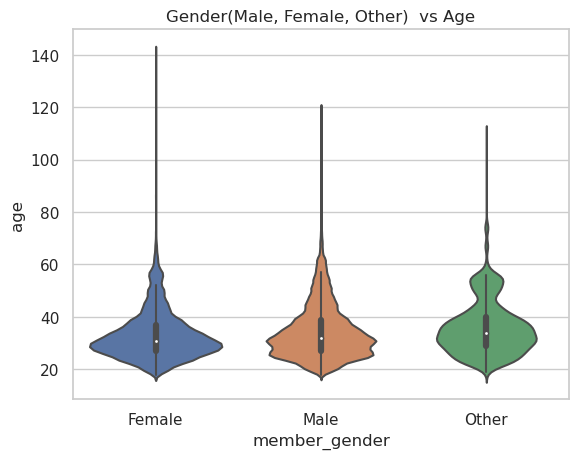

In [35]:
sb.set(style = 'whitegrid');
plt.title("Gender(Male, Female, Other)  vs Age");
sb.violinplot(data = bikes, x ='member_gender', y ='age');

From the violin plot above the age appears to be almost the same across all the genders. 

## 15 Question
* How does the hours vary for the specific User Types.

## Visualization

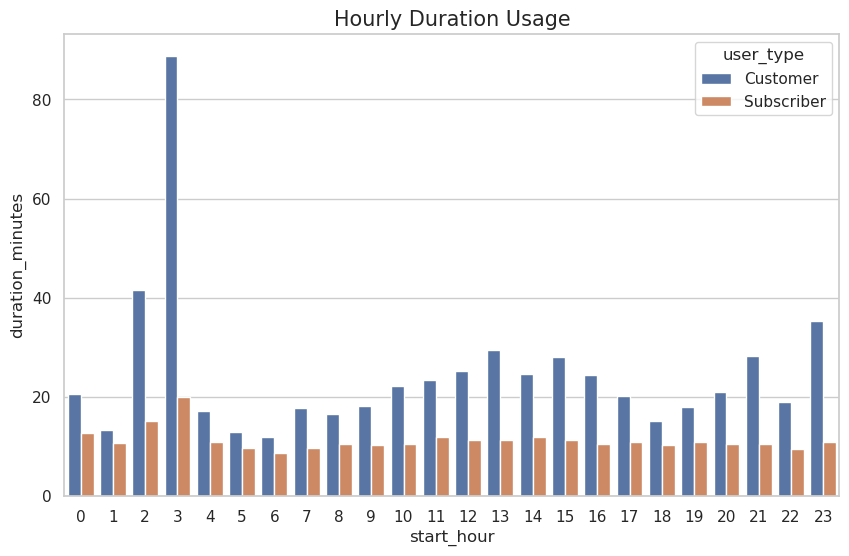

In [36]:
plt.figure(figsize=(10,6));
plt.title('Hourly Duration Usage', fontsize=15);
sb.barplot(data = bikes, x='start_hour', y='duration_minutes', ci=None, hue='user_type');

## Observation
At 3 it can be seen that for the Customer there was a really high peak.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> There are more male users compared to female users.

> Subscriber tend to average more duration time compared to customers.


## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.


## Extra
With extra information such as population and address of the users then further analysis can be done to know what influenced the Data and it's outcome.

In [6]:
!jupyter nbconvert Presentation.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Presentation.ipynb to slides
[NbConvertApp] Writing 709690 bytes to Presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Presentation.slides.html
Use Control-C to stop this server
^C

Interrupted
